# Hierarchical Clustering

A good comparion of various Clustering algorithms is provided here https://scikit-learn.org/stable/modules/clustering.html#


Source - Udemy Course.

    Clustering Types
        1. Agglomerative (Bottom - Top Approach)
        2. Divisive (Top-Down Approach)

## Agglomerative Clustering:

* Steps involved in Agglomerative HC
    1. Each data point is a separate cluster. i.e. N clusters
    2. combine two closest Clusters into one cluster.
    3. Repeat the step 2 until one huge cluster left.
    


## How do you measure the closeness of clusters ?

1. For a single point we can use Euclidian Distance = $ \sqrt{(x_2 - x_1)^2 - (y_2 - y_1)^2}$
2. But for the clusters having multiple points We need use Linkages.
    * **Single Linkage** - Distance between Two **closest** points in those clusters.
    * **Complete Linkage** - Distance between Two **farthest** points in those clusters.
    * **Average** of all the distances
    * Distance between **centroids**.
    * **Ward’s Linkage**: cluster criteria = Minimize the variance in the cluster

**Single Linkage:** Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure

**Complete Linkage:** Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

**Average Linkage:** Average intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

**Centroid Linkage:** The dissimilarity between the centroid for cluster A and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

- cluster distance is the distance of the centroids of both clusters

**Ward's linkage:** Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


* the results are similar to the K-means Clustering

### Dendrograms

* The Dendrogram is like the Memory of the algorithm.
* The height of the Dendrogram Vertical Bars indicates two things :-
        1. the Euclidian distance between the clusters.
        2. and also the level of Dissimilarities between the clusters.

## How to use the Dendrograms?
* We can set the height thresholds / Dissimilarity thresholds. we can define the acceptable dissimilarity within a cluster.
* Ex. if we say - we don't want dissimilarity above this point on Y-axis then at that point we will draw a horizontal line and the no. of vertical lines this horizontal line cuts that will be the no. of required clusters.

<img src="Dendrograms 4 clusters demo.png">

## How to find the optimal no. of clusters from the dendrogram ?
Just look for the longest vertical line.

<img src="dendrogram 3 cluster demo.png">

## Show the code for making a dendrogram.

In [1]:
# Importing the dataset
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data.iloc[:, [3, 4]].values # We are selecting just the last two columns for simplicity.

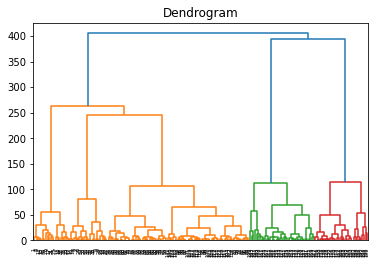

In [5]:
# Let's create the Dendrogram

import scipy.cluster.hierarchy as SCH
dendrogram = SCH.dendrogram(SCH.linkage(X, method='ward'))

import matplotlib.pyplot as plt
plt.title("Dendrogram")
plt.savefig("Dendrogram_of_Mall_Customers.png", dpi=1000)
plt.show()

Now Looking at the Dendrogram we can say that the optimal no. of clusters clould be 5.

In [6]:
# Let's train the Clustering model on our Dataset

# 1st creating the Model 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

#2nd fitting And predicting
y = cluster.fit_predict(X)

In [7]:
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


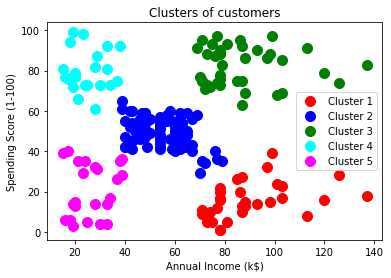

In [8]:
# let's visualize the clusters.
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()